In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import cv2, glob, random, math, numpy as np, dlib, itertools
import os
import random
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import plot_confusion_matrix
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt1
import tensorflow as tf

In [2]:
# ใส่ ข้อมูลตรงนี้
#load data
#X = np.load('/content/drive/MyDrive/Colab Notebooks/feature Extraction(.npy)/features_GABOR.npy') 
#y = np.load('/content/drive/MyDrive/Colab Notebooks/feature Extraction(.npy)/labels_GABOR.npy')

#X = np.load('/content/drive/MyDrive/Colab Notebooks/feature Extraction(.npy)/features_HLAC.npy') 
#y = np.load('/content/drive/MyDrive/Colab Notebooks/feature Extraction(.npy)/labels_HLAC.npy')

X = np.load('D:/img_240/HOG_8_label/feture_HOG_8_label/train/HOG_embreded.npy') 
y = np.load('D:/img_240/HOG_8_label/feture_HOG_8_label/train/labels_HOG.npy')

#X = np.load('C:/Users/ROG/Downloads/feature Extraction(.npy)/feature Extraction(.npy)/features_LAND.npy') 
#y = np.load('C:/Users/ROG/Downloads/feature Extraction(.npy)/feature Extraction(.npy)/labels_LAND.npy')

#X = np.load('/content/drive/MyDrive/Colab Notebooks/feature Extraction(.npy)/features_LBP.npy') 
#y = np.load('/content/drive/MyDrive/Colab Notebooks/feature Extraction(.npy)/labels_LBP.npy')

In [3]:
X.shape  #check shape

(23988, 5052)

In [5]:
 cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None) #split fold 5 fold

In [6]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    cm1 = cf.astype(np.float64) / cf.sum(axis=1)[:, np.newaxis]
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ['{:.2f}'.format(value) for value in cm1.flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [7]:
def model_roc_curve(X, y, model, cv):
    #ส่วน f.confusion matrix
    def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if not title:
            if normalize:
                title = 'Normalized confusion matrix'
            else:
                title = 'Confusion matrix, without normalization'

        # Compute confusion matrix
        cm1 = confusion_matrix(y_true, y_pred)
        
        # Only use the labels that appear in the data
        classes = classes
        if normalize:
            cm = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
  

        fig, ax = plt.subplots(figsize=(12,6))
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return ax

    #ตัวเเปร 5 fold สำหรับ roc curve
    fig1 = plt.figure(figsize=[8, 8])
    mean_score = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    y_testanger = []
    X_testanger = []
    
    fpr1 = []
    tpr1 = []
    roc_auc1 = []
    tprs1 = []
    aucs1 = []
    mean_fpr1 = np.linspace(0, 1, 100)

    fpr2 = []
    tpr2 = []
    roc_auc2 = []
    tprs2 = []
    aucs2 = []
    mean_fpr2 = np.linspace(0, 1, 100)

    fpr3 = []
    tpr3 = []
    roc_auc3 = []
    tprs3 = []
    aucs3 = []
    mean_fpr3 = np.linspace(0, 1, 100)

    fpr4= []
    tpr4= []
    roc_auc4= []
    tprs4 = []
    aucs4 = []
    mean_fpr4 = np.linspace(0, 1, 100)

    fpr5= []
    tpr5= []
    roc_auc5= []
    tprs5 = []
    aucs5 = []
    mean_fpr5 = np.linspace(0, 1, 100)

    fpr6= []
    tpr6= []
    roc_auc6= []
    tprs6 = []
    aucs6 = []
    mean_fpr6 = np.linspace(0, 1, 100)

    fpr7= []
    tpr7= []
    roc_auc7= []
    tprs7 = []
    aucs7 = []
    mean_fpr7 = np.linspace(0, 1, 100)
    
    fpr8= []
    tpr8= []
    roc_auc8= []
    tprs8 = []
    aucs8 = []
    mean_fpr8 = np.linspace(0, 1, 100)
    
    #parameter for find SD 
    sumAcc_anger =[]
    sumAcc_disgust =[]
    sumAcc_fear = []
    sumAcc_hapiness = []
    sumAcc_neutral = []
    sumAcc_sad = []
    sumAcc_surprise = []
    i = 0
    num = 1

    #เริ่มเเบ่ง fold
    for train, test in cv.split(X, y):
        X_train = X[train]
        X_test = X[test]
        y_train = y[train]
        y_test = y[test]
        y_testanger = []
        X_testanger = []
        model.fit(X_train, y_train)
        lw = 2
        y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
        y_pred = model.predict_proba(X_test)
        

        fpr = {}
        tpr = {}
        thresh ={}
        roc_auc = dict()
        classes=np.unique(y_test)
        n_class = classes.shape[0]

        #เก็บค่า fpr tpr เเต่ละอารมณ์ เเต่ละ fold
        fpr[0], tpr[0], _ = roc_curve(y_test_binarized[:,0],y_pred[:,0])
        fpr1.append(fpr[0])
        tpr1.append(tpr[0])
        tprs1.append(np.interp(mean_fpr1, fpr[0], tpr[0])) #ไว้ใช้หาค่า mean
        roc_auc[0] = auc(fpr[0], tpr[0])
        roc_auc1.append(roc_auc[0])
        aucs1.append(roc_auc[0]) #ไว้ใช้หาค่า std
        
        fpr[1], tpr[1], _ = roc_curve(y_test_binarized[:,1],y_pred[:,1])
        fpr2.append(fpr[1])
        tpr2.append(tpr[1])
        tprs2.append(np.interp(mean_fpr2, fpr[1], tpr[1]))
        roc_auc[1] = auc(fpr[1], tpr[1])
        roc_auc2.append(roc_auc[1])
        aucs2.append(roc_auc[1]) 
        
        fpr[2], tpr[2], _ = roc_curve(y_test_binarized[:,2],y_pred[:,2])
        fpr3.append(fpr[2])
        tpr3.append(tpr[2])
        tprs3.append(np.interp(mean_fpr3, fpr[2], tpr[2]))
        roc_auc[2] = auc(fpr[2], tpr[2])
        roc_auc3.append(roc_auc[2])
        aucs3.append(roc_auc[2])
        
        fpr[3], tpr[3], _ = roc_curve(y_test_binarized[:,3],y_pred[:,3])
        fpr4.append(fpr[3])
        tpr4.append(tpr[3])
        tprs4.append(np.interp(mean_fpr4, fpr[3], tpr[3]))
        roc_auc[3] = auc(fpr[3], tpr[3])
        roc_auc4.append(roc_auc[3])
        aucs4.append(roc_auc[3]) 
        
        fpr[4], tpr[4], _ = roc_curve(y_test_binarized[:,4],y_pred[:,4])
        fpr5.append(fpr[4])
        tpr5.append(tpr[4])
        tprs5.append(np.interp(mean_fpr5, fpr[4], tpr[4]))
        roc_auc[4] = auc(fpr[4], tpr[4])
        roc_auc5.append(roc_auc[4])
        aucs5.append(roc_auc[4]) 
        
        fpr[5], tpr[5], _ = roc_curve(y_test_binarized[:,5],y_pred[:,5])
        fpr6.append(fpr[5])
        tpr6.append(tpr[5])
        tprs6.append(np.interp(mean_fpr6, fpr[5], tpr[5]))
        roc_auc[5] = auc(fpr[5], tpr[5])
        roc_auc6.append(roc_auc[5])
        aucs6.append(roc_auc[5]) 
        
        fpr[6], tpr[6], _ = roc_curve(y_test_binarized[:,6],y_pred[:,6])
        fpr7.append(fpr[6])
        tpr7.append(tpr[6])
        tprs7.append(np.interp(mean_fpr7, fpr[6], tpr[6]))
        roc_auc[6] = auc(fpr[6], tpr[6])
        roc_auc7.append(roc_auc[6])
        aucs7.append(roc_auc[6])
        
        fpr[7], tpr[7], _ = roc_curve(y_test_binarized[:,7],y_pred[:,7])
        fpr8.append(fpr[7])
        tpr8.append(tpr[7])
        tprs8.append(np.interp(mean_fpr8, fpr[7], tpr[7]))
        roc_auc[7] = auc(fpr[7], tpr[7])
        roc_auc8.append(roc_auc[7])
        aucs8.append(roc_auc[7])
        
        #save models#

        filename = 'embeded_HOG_model_8_lebel' + str(model) + str(num) + '.sav'
        pickle.dump(model, open(filename, 'wb'))
        print('fold '+ str(num))
        print()
        num += 1
        


        #confusion matrix
        label_mapdisgust = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
        pred = model.predict(X_test)
        cm = confusion_matrix(y_test, pred)
        #cm1 = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
        cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                             columns = label_mapdisgust
                            )
        
        final_cm = cm_df

        #เเสดงผล confus matrix
        emotion_labels = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
        plt.figure(figsize = (5,5))
        make_confusion_matrix(cm, figsize=(9,7), categories=emotion_labels)
        plt.title('Emotion Classify')
        plt.ylabel('True class')
        plt.xlabel('Prediction class')
        plt.show()
        

        #Accurancy Score
        def add_values_in_dict(sample_dict, key, list_of_values):
            ''' Append multiple values to a key in 
            the given dictionary '''
            if key not in sample_dict:
                sample_dict[key] = list()
            sample_dict[key].extend(list_of_values)
            return sample_dict

        #ใช้เก็บค่า TP FP FN TN ใน loop  confus matrix 8*8
        TP2 = 0
        FP2 = 0 
        FN2 = 0
        TN2 = 0
        scor = {}
        avg_scor = {}
        ac = 0
        pr = 0
        re = 0
        f1 = 0
        sp = 0
        for i in range(final_cm.shape[0]):
          TP = final_cm.iloc[i,i]
          FP =  final_cm.iloc[i,:].sum() - TP
          FN =  final_cm.iloc[: ,i].sum() - TP
          TN =  final_cm.sum().sum() - TP -FP - FN
          TP2 += TP
          FP2 += FP
          FN2 += FN
          TN2 += TN
          Accuracy = (TP + TN)  /  final_cm.sum().sum()
          Precision = TP / (TP + FP)
          Recall = TP / (TP + FN)
          Specificity = TN / (TN + FP)
          F1_Score = (2* Precision * Recall ) / (Precision + Recall)
            
            
          if i == 0:
              sumAcc_anger.append(Accuracy)
          if i == 1:
              sumAcc_disgust.append(Accuracy)
          if i == 2:
              sumAcc_fear.append(Accuracy)
          if i == 3:
              sumAcc_hapiness.append(Accuracy)
          if i == 4:
              sumAcc_neutral.append(Accuracy)
          if i == 5:
              sumAcc_sad.append(Accuracy)
          if i == 6:
              sumAcc_surprise.append(Accuracy)
                
          print("Class:",final_cm.index[i],"Accuracy:",Accuracy,"Precision:", Precision,"Recall:", Recall, 
                "F1_Score:", F1_Score, "Specificity:", Specificity )
          print()

          ac += Accuracy
          pr += Precision
          re += Recall
          f1 += F1_Score
          sp += Specificity

        #ตารางแสดงค่า Accuracy, Precision, Recall,F1_Score,Specificity
          add_values_in_dict(scor, final_cm.index[i], [f'{Accuracy:.2f}',f'{Precision:.2f}',f'{Recall:.2f}',f'{F1_Score:.2f}',f'{Specificity:.2f}'])
        print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('','Accuracy','Precision','Recall','F1_Score','Specificity'))
        for k, v in scor.items():
            Accuracy, Precision, Recall,F1_Score,Specificity = v
            print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, Accuracy, Precision, Recall,F1_Score,Specificity))
              #pd.DataFrame(classification_report(model.y_train, model.pred)).T
        add_values_in_dict(avg_scor,'macro avg',[f'{ac/8:.2f}' , f'{pr/8:.2f}' , f'{re/8:.2f}' , f'{f1/8:.2f}', f'{sp/8:.2f}'])
        print()
        for k, v in avg_scor.items():
            ac, pr, re,f1,sp = v
            print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, ac, pr, re,f1,sp))
   
        
        Specificity = TN2 / (TN2 + FP2)
        Sensitivity = TP2 / (FN2 + TP2)
        print()  
        print("Specificity", f'{Specificity:.2f}')
        print("Sensitivity", f'{Sensitivity:.2f}')
        print()
        print("TP:", TP2)
        print("FN:", FN2)
        print("FP:", FP2)
        print("TN:", TN2)
        print()
        Score = accuracy_score(y_test, pred)
        mean_score.append(Score)
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
#สิ้นสุด loop 5 fold


    print()

    score_np = np.array(mean_score)
    print(f'Mean accuracy = {np.mean(mean_score) * 100:.2f}%')
    print()
    STD1 = np.std(sumAcc_anger)*100
    print("The Standard diviation Accuracy of Anger :", STD1,"%")
    STD2 = np.std(sumAcc_disgust)*100
    print("The Standard diviation Accuracy of Disgust :", STD2,"%")
    STD3 = np.std(sumAcc_fear)*100
    print("The Standard diviation Accuracy of Fear :", STD3,"%")
    STD4 = np.std(sumAcc_hapiness)*100
    print("The Standard diviation Accuracy of Hapiness :", STD4,"%")
    STD5 = np.std(sumAcc_neutral)*100
    print("The Standard diviation Accuracy of Neutral :", STD5,"%")
    STD6 = np.std(sumAcc_sad)*100
    print("The Standard diviation Accuracy of Sad :", STD6,"%")
    STD7 = np.std(sumAcc_surprise)*100
    print("The Standard diviation Accuracy of Surprise :", STD7,"%")

    
    ###print ROC curve in each emotion###
    for i in range(5) :
        plt.plot(fpr1[i], tpr1[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[0],i,roc_auc1[i]))
        i +=1
    mean_tpr1 = np.mean(tprs1, axis=0)
    mean_auc1 = auc(mean_fpr1, mean_tpr1)
    mean_tpr1[0] = 0.0
    std_auc1 = np.std(aucs1)
    plt.plot(mean_fpr1, mean_tpr1, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc1, std_auc1), lw=2, alpha=1)    
    std_tpr = np.std(tprs1, axis=0)
    tprs_upper = np.minimum(mean_tpr1 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr1 - std_tpr, 0)
    plt.fill_between(
        mean_fpr1,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    

    for i in range(5) :
        plt.plot(fpr2[i], tpr2[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[1], i, roc_auc2[i]))
        i += 1
    mean_tpr2 = np.mean(tprs2, axis=0)
    mean_auc2 = auc(mean_fpr2, mean_tpr2)
    mean_tpr2[0] = 0.0
    std_auc2 = np.std(aucs2)
    plt.plot(mean_fpr2, mean_tpr2, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc2, std_auc2), lw=2, alpha=1)    
    std_tpr = np.std(tprs2, axis=0)
    tprs_upper = np.minimum(mean_tpr2 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr2 - std_tpr, 0)
    plt.fill_between(
        mean_fpr2,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
                                                                           
    for i in range(5) :
        plt.plot(fpr3[i], tpr3[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[2],i,roc_auc3[i]))
        i+=1
    mean_tpr3 = np.mean(tprs3, axis=0)
    mean_auc3 = auc(mean_fpr3, mean_tpr3)
    mean_tpr3[0] = 0.0
    std_auc3 = np.std(aucs3)
    plt.plot(mean_fpr3, mean_tpr3, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc3, std_auc3), lw=2, alpha=1)   
    std_tpr = np.std(tprs3, axis=0)
    tprs_upper = np.minimum(mean_tpr3 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr3 - std_tpr, 0)
    plt.fill_between(
        mean_fpr3,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr4[i], tpr4[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[3],i,roc_auc4[i]))
        i+=1
    mean_tpr4 = np.mean(tprs4, axis=0)
    mean_auc4 = auc(mean_fpr4, mean_tpr4)
    mean_tpr4[0] = 0.0
    std_auc4 = np.std(aucs4)
    plt.plot(mean_fpr4, mean_tpr4, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc4, std_auc4), lw=2, alpha=1)     
    std_tpr = np.std(tprs4, axis=0)
    tprs_upper = np.minimum(mean_tpr4 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr4 - std_tpr, 0)
    plt.fill_between(
        mean_fpr4,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
                                            
    for i in range(5) :
        plt.plot(fpr5[i], tpr5[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[4],i,roc_auc5[i]))
        i+=1
    mean_tpr5 = np.mean(tprs5, axis=0)
    mean_auc5 = auc(mean_fpr5, mean_tpr5)
    mean_tpr5[0] = 0.0
    std_auc5 = np.std(aucs5)
    plt.plot(mean_fpr5, mean_tpr5, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc5, std_auc5), lw=2, alpha=1)     
    std_tpr = np.std(tprs5, axis=0)
    tprs_upper = np.minimum(mean_tpr5 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr5 - std_tpr, 0)
    plt.fill_between(
        mean_fpr5,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr6[i], tpr6[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[5],i,roc_auc6[i]))
        i+=1
    mean_tpr6 = np.mean(tprs6, axis=0)
    mean_auc6 = auc(mean_fpr6, mean_tpr6)
    mean_tpr6[0] = 0.0
    std_auc6 = np.std(aucs6)
    plt.plot(mean_fpr6, mean_tpr6, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc6, std_auc6), lw=2, alpha=1)   
    std_tpr = np.std(tprs6, axis=0)
    tprs_upper = np.minimum(mean_tpr6 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr6 - std_tpr, 0)
    plt.fill_between(
        mean_fpr6,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr7[i], tpr7[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[6],i,roc_auc7[i]))
        i+=1
    mean_tpr7 = np.mean(tprs7, axis=0)
    mean_auc7 = auc(mean_fpr7, mean_tpr7)
    mean_tpr7[0] = 0.0
    std_auc7 = np.std(aucs7)
    plt.plot(mean_fpr7, mean_tpr7, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc7, std_auc7), lw=2, alpha=1) 
    std_tpr = np.std(tprs7, axis=0)
    tprs_upper = np.minimum(mean_tpr7 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr7 - std_tpr, 0)
    plt.fill_between(
        mean_fpr7,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr8[i], tpr8[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[2],i,roc_auc8[i]))
        i+=1
    mean_tpr8 = np.mean(tprs8, axis=0)
    mean_auc8 = auc(mean_fpr8, mean_tpr8)
    mean_tpr8[0] = 0.0
    std_auc8 = np.std(aucs8)
    plt.plot(mean_fpr8, mean_tpr8, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc8, std_auc8), lw=2, alpha=1)   
    std_tpr = np.std(tprs8, axis=0)
    tprs_upper = np.minimum(mean_tpr8 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr8 - std_tpr, 0)
    plt.fill_between(
        mean_fpr8,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()


fold 1



<Figure size 576x576 with 0 Axes>

<Figure size 360x360 with 0 Axes>

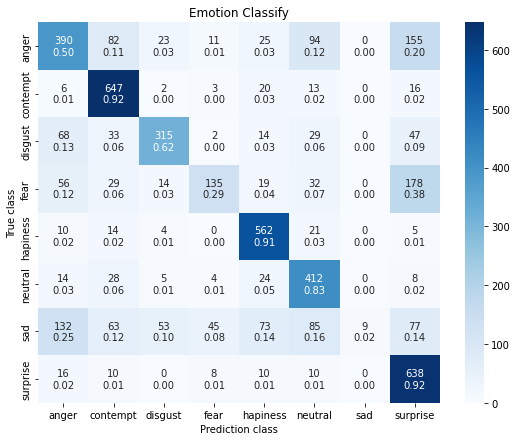

Class: anger Accuracy: 0.8557732388495206 Precision: 0.5 Recall: 0.5635838150289018 F1_Score: 0.5298913043478262 Specificity: 0.9050170482221139

Class: contempt Accuracy: 0.9335139641517299 Precision: 0.9151343705799151 Recall: 0.7141280353200883 F1_Score: 0.8022318660880348 Specificity: 0.9845837615621789

Class: disgust Accuracy: 0.9387244685285535 Precision: 0.6200787401574803 Recall: 0.7572115384615384 F1_Score: 0.6818181818181818 Specificity: 0.9559561843906892

Class: fear Accuracy: 0.9164235097957483 Precision: 0.2915766738660907 Recall: 0.6490384615384616 F1_Score: 0.4023845007451565 Specificity: 0.9285403050108932

Class: hapiness Accuracy: 0.9501875781575656 Precision: 0.9123376623376623 Recall: 0.7523427041499331 F1_Score: 0.8246515040352164 Specificity: 0.9866699580350531

Class: neutral Accuracy: 0.9235097957482284 Precision: 0.8323232323232324 Recall: 0.5919540229885057 F1_Score: 0.6918555835432411 Specificity: 0.9797659678205753

Class: sad Accuracy: 0.8899541475614839 

<Figure size 360x360 with 0 Axes>

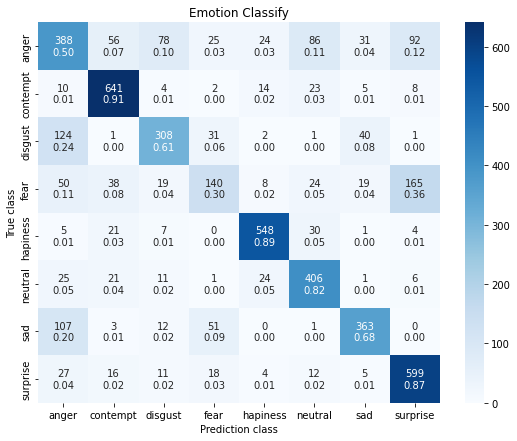

Class: anger Accuracy: 0.8457690704460191 Precision: 0.49743589743589745 Recall: 0.5271739130434783 F1_Score: 0.5118733509234829 Specificity: 0.9034958148695224

Class: contempt Accuracy: 0.9537307211338057 Precision: 0.9066478076379066 Recall: 0.8042659974905897 F1_Score: 0.8523936170212765 Specificity: 0.9835041239690078

Class: disgust Accuracy: 0.9287203001250521 Precision: 0.6062992125984252 Recall: 0.6844444444444444 F1_Score: 0.6430062630480167 Specificity: 0.954001839926403

Class: fear Accuracy: 0.9060025010421009 Precision: 0.3023758099352052 Recall: 0.5223880597014925 F1_Score: 0.38303693570451436 Specificity: 0.9286975717439293

Class: hapiness Accuracy: 0.9699874947894956 Precision: 0.8896103896103896 Recall: 0.8782051282051282 F1_Score: 0.8838709677419355 Specificity: 0.9837086727359846

Class: neutral Accuracy: 0.944560233430596 Precision: 0.8202020202020202 Recall: 0.6963979416809606 F1_Score: 0.7532467532467533 Specificity: 0.9788849347568209

Class: sad Accuracy: 0.94

<Figure size 360x360 with 0 Axes>

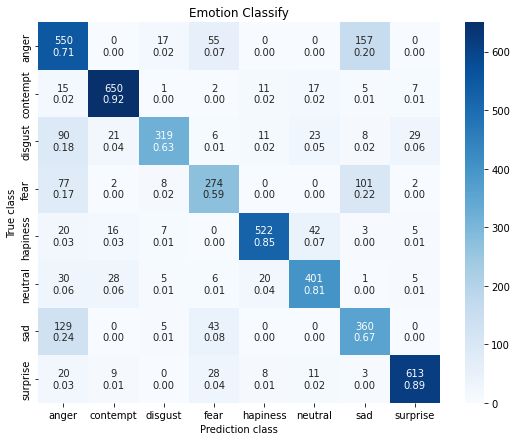

Class: anger Accuracy: 0.8728636932055023 Precision: 0.7060333761232349 Recall: 0.5907626208378088 F1_Score: 0.6432748538011696 Specificity: 0.9407809671580036

Class: contempt Accuracy: 0.9720716965402251 Precision: 0.9180790960451978 Recall: 0.8953168044077136 F1_Score: 0.9065550906555091 Specificity: 0.9857563850687623

Class: disgust Accuracy: 0.9518549395581493 Precision: 0.6291913214990138 Recall: 0.8812154696132597 F1_Score: 0.7341772151898733 Specificity: 0.957619477006312

Class: fear Accuracy: 0.9312213422259275 Precision: 0.5905172413793104 Recall: 0.6618357487922706 F1_Score: 0.6241457858769933 Specificity: 0.9566605839416058

Class: hapiness Accuracy: 0.9701959149645686 Precision: 0.848780487804878 Recall: 0.9125874125874126 F1_Score: 0.8795282224094356 Specificity: 0.9779933743492665

Class: neutral Accuracy: 0.9608170070862859 Precision: 0.8084677419354839 Recall: 0.8117408906882592 F1_Score: 0.8101010101010101 Specificity: 0.9779275092936803

Class: sad Accuracy: 0.9051

<Figure size 360x360 with 0 Axes>

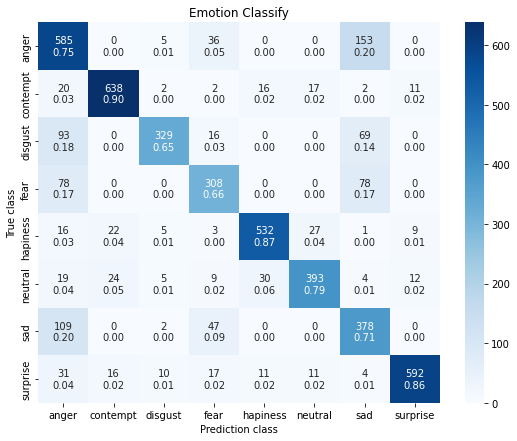

Class: anger Accuracy: 0.8832603710652491 Precision: 0.7509627727856226 Recall: 0.6151419558359621 F1_Score: 0.676300578034682 Specificity: 0.9495579823192928

Class: contempt Accuracy: 0.9724828017510945 Precision: 0.9011299435028248 Recall: 0.9114285714285715 F1_Score: 0.90625 Specificity: 0.9829143275567488

Class: disgust Accuracy: 0.9568480300187617 Precision: 0.6489151873767258 Recall: 0.9189944134078212 F1_Score: 0.7606936416184971 Specificity: 0.959900878576256

Class: fear Accuracy: 0.940379403794038 Precision: 0.6637931034482759 Recall: 0.7031963470319634 F1_Score: 0.6829268292682926 Specificity: 0.9642119752236752

Class: hapiness Accuracy: 0.9708150927663123 Precision: 0.865040650406504 Recall: 0.9032258064516129 F1_Score: 0.8837209302325582 Specificity: 0.9802756653992395

Class: neutral Accuracy: 0.9670627475505524 Precision: 0.7923387096774194 Recall: 0.8772321428571429 F1_Score: 0.8326271186440678 Specificity: 0.9763163945734652

Class: sad Accuracy: 0.9022305607671461 

<Figure size 360x360 with 0 Axes>

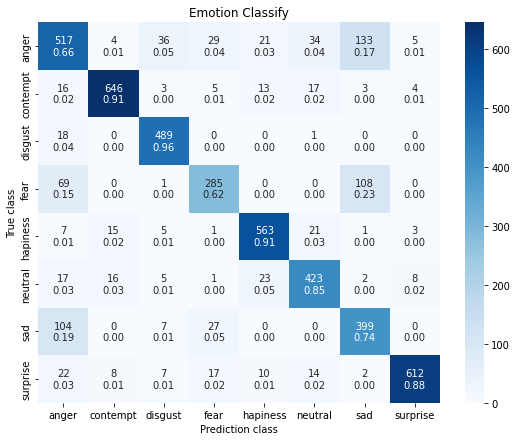

Class: anger Accuracy: 0.8926412341046487 Precision: 0.6636713735558408 Recall: 0.6714285714285714 F1_Score: 0.6675274370561654 Specificity: 0.9349391606655079

Class: contempt Accuracy: 0.978319783197832 Precision: 0.9137199434229137 Recall: 0.9375907111756169 F1_Score: 0.9255014326647564 Specificity: 0.9851509250243428

Class: disgust Accuracy: 0.9826975192828852 Precision: 0.9625984251968503 Recall: 0.8842676311030742 F1_Score: 0.9217719132893496 Specificity: 0.9955230914231856

Class: fear Accuracy: 0.9462163852407754 Precision: 0.6155507559395248 Recall: 0.7808219178082192 F1_Score: 0.6884057971014492 Specificity: 0.9598375451263538

Class: hapiness Accuracy: 0.9749843652282677 Precision: 0.913961038961039 Recall: 0.8936507936507937 F1_Score: 0.9036918138041734 Specificity: 0.9872810175185985

Class: neutral Accuracy: 0.9668542839274546 Precision: 0.8545454545454545 Recall: 0.8294117647058824 F1_Score: 0.8417910447761193 Specificity: 0.9832050384884534

Class: sad Accuracy: 0.9193

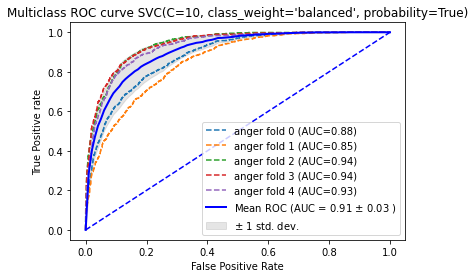

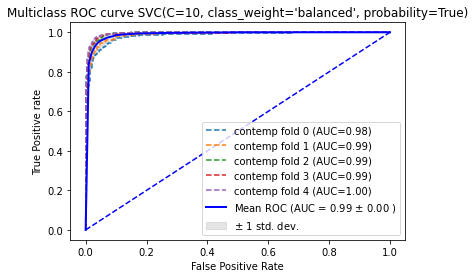

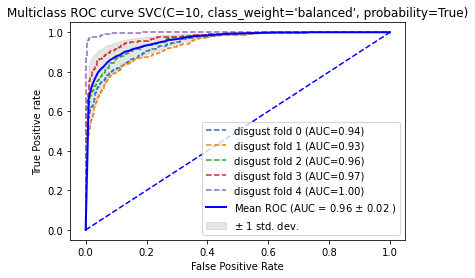

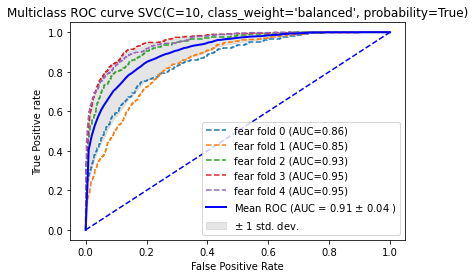

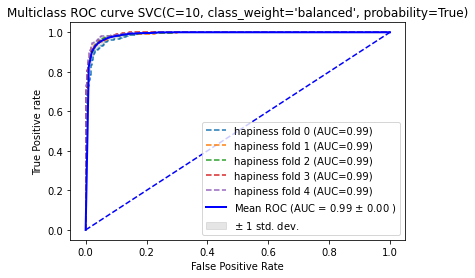

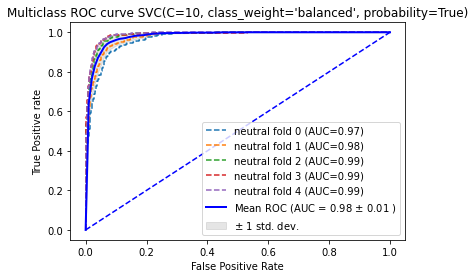

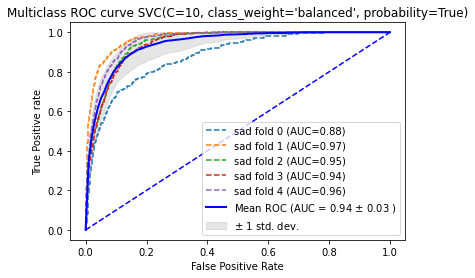

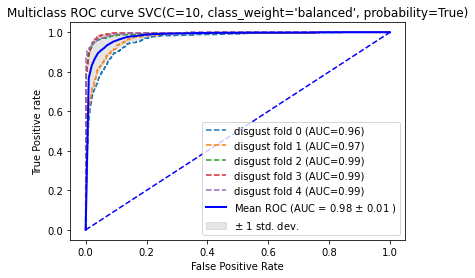


CPU times: total: 5h 38min 33s
Wall time: 5h 39min 5s


In [8]:
%%time #show time to used

#input models
algo = [[svm.SVC(kernel='rbf', gamma='scale', C= 10, class_weight='balanced',probability=True), 'SVM Linear Kernel']]
            #[KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
            #[linear_model.LogisticRegression(C=1e5), 'LogisticRegression'],
            #[GaussianNB(), 'GaussianNB'],
            #[RandomForestClassifier(min_samples_leaf=3), 'RandomForestClassifier']]

#loop a model
for a in algo:
  model = a[0]

  model_roc_curve(X, y, model,cv)